# Insper - Modelagem e Simulação do Mundo Físico#

**Projeto 2 - Sistemas Térmicos - Grupo:5**

Vamos modelar um sistema térmico(Panela + água) a partir dos conceitos vistos em aula.

Uma possível pergunta, a ser respondida por nosso modelo, seria: **qual o tempo necessário para que a temperatura da água atinja 100°C, com  diferentes potências?**

Utilizamos uma  panela de 0,1 m X 0,64 m X 0,3m. Com espessura de 0,2 cm , o qual estará repleto de água.


**Dados Experimentais Sem Tampa**

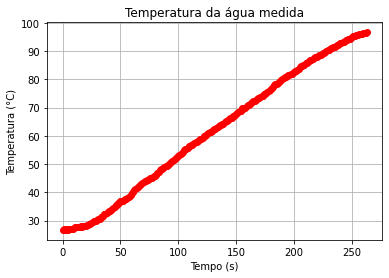

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


def dados_medidos():
    sem_tampa_medido=[26.667,26.882,26.774,26.774,26.882,26.774,26.882,26.882,26.989,26.989,27.312,27.634,27.742,27.742,27.849,27.849,27.957,27.742,28.065,28.172,28.172,28.280,28.495,28.710,28.925,29.247,29.462,29.677,29.785,29.892,30.215,30.430,30.645,31.075,31.398,31.720,32.151,32.366,32.796,33.011,33.226,33.441,33.656,33.978,34.409,34.946,35.376,35.484,36.129,36.344,36.882,36.774,36.989,37.097,37.527,37.742,37.957,38.495,38.817,39.140,39.677,40.215,40.753,41.075,41.505,41.935,42.258,42.473,42.903,43.441,43.656,43.871,44.086,44.409,44.301,44.731,44.946,45.161,45.376,45.591,45.914,46.237,46.667,47.312,47.742,48.065,48.387,48.710,49.032,49.355,49.462,49.785,50.108,50.538,50.753,51.183,51.398,51.828,52.043,52.366,52.688,53.118,53.548,53.871,54.301,54.839,55.161,55.484,55.806,56.237,56.452,56.667,56.882,57.097,57.312,57.634,57.742,58.065,58.387,58.710,59.032,59.247,59.785,60.000,60.215,60.645,60.860,61.290,61.398,61.720,62.043,62.258,62.473,62.796,63.118,63.333,63.656,63.978,64.086,64.301,64.839,65.161,65.376,65.591,65.806,66.129,66.452,66.882,67.097,67.419,67.634,67.957,68.387,68.710,68.925,69.677,69.570,69.892,70.000,70.430,70.753,70.860,71.290,71.613,71.935,72.258,72.473,72.796,73.011,73.226,73.548,73.871,74.194,74.194,74.624,74.946,75.269,75.484,75.699,76.129,76.559,76.989,77.312,77.849,78.172,78.387,78.817,79.140,79.462,79.677,80.000,80.323,80.645,80.968,81.075,81.398,81.613,81.828,82.043,82.366,82.581,82.903,83.011,83.441,83.656,84.301,84.624,84.839,85.161,85.054,85.699,85.806,86.237,86.559,86.667,86.989,87.097,87.527,87.742,87.957,88.065,88.172,88.495,88.710,89.032,89.247,89.355,89.570,90.000,90.215,90.430,90.753,90.968,91.075,91.398,91.505,91.828,92.043,92.151,92.366,92.688,92.903,93.118,93.333,93.548,93.763,93.978,94.194,94.409,94.624,95.054,95.161,95.269,95.484,95.699,95.699,95.914,96.022,96.129,96.129,96.237,96.452,96.559,96.667]
    z= len(sem_tampa_medido)
    tempo_medido= np.arange(0,z,1)
    return tempo_medido,sem_tampa_medido


tempo_medido,sem_tampa_medido = dados_medidos()
plt.plot(tempo_medido,sem_tampa_medido, 'ro')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura da água medida')
plt.xlabel('Tempo (s)')
plt.grid(True)
plt.show()  




**MODELANDO NOSSO SISTEMA**

**Representação do sistema (Panela + água) sem tampa:**
    

<left><img src="sistema_sem_tampa.jpeg" width=800 style="float: center; margin: 0px 0px 10px 10px"></left>

**Diagrama de Estoques e Fluxos da energia interna da panela e água + equações diferenciais**

<left><img src="diagrama_sem_tampa_4.png" width=800 style="float: center; margin: 0px 0px 10px 10px"></left>

**Equações diferenciais em função dos fluxos de calor** obs: Usamos essa para facilitar a implementação.

<left><img src="equações_sem_tampa_2.png" width=800 style="float: center; margin: 0px 0px 10px 10px"></left>

**PARÂMETROS**

In [16]:
import math

######PANELA DE ALUMÍNIO##########

#aprox 3,3mm de espessura
#aprox 10cm de altura
#aprox 30cm de diâmetro
#aprox 64cm de curvatura
#volume que a panela suporta = 3.3 l
diametro_interno = 0.0208 # diamnetro interno em m
diametro_externo = 0.022 #diamnetro externo em m
dp= 0.0025/2 #espessura da panela em m
rp_interno= diametro_interno/2  #raio da panela
rp_externo = diametro_externo/2
h=0.1 #altura da panela

Ap= 2*math.pi*h*rp_externo + math.pi*(rp_externo**2) #area da panela(cilindrica) (m^2)

kp= 237 # condutividade térmica da panela em W/mK
cp=921  #calor especifico da panela  em #J/kg.K 

mp= 0.526   #massa em kg

Tp_0 = 26 +273.15   #temperatura da panela inicial em Kelvin


######ÁGUA##############

densidade_agua = 997 # densidade da água  em kg/m³

Va= 0.001 # Volume de água em m^3
ca= 4180 #calor especifico da água em J/kg K
ma= densidade_agua*Va #massa da água
print(ma*ca)

Tag_0 = 26+273.15 #temperatura da água inicial em Kelvin


######## Medidas do fogo  #################

P = 2000  #potencia do fogão em W

######Outros####


Tar = 26+273.15  #temperatura ambiente em kelvin

hpag= 2500 #coef.tranf.convectica panela-água em w/m2k (50-3000)
hat= 59 #coeficiente de transferência convectiva do ar para a tampa em W/(m2K)
hpa = 750  #coeficiente de transferência convectiva da panela para o ar (0-1000)
haga = 750 #(0-1000)
area_contato = math.pi*(rp_interno**2)#contato entre agua e ambiente(superficie) em m

4167.46


**Iteração**

In [17]:
#Função

def modelo(x,t):  # (Tp_0,Ta)
    Tp = x[0]
    Tag = x[1]

    #Fluxos de Calor
    
    Qf = P 
    Qpa = (Tp - Tar)/((dp/(kp*Ap))+(1/(hpa*Ap)))
    Qpag =(Tp-Tag)*(hpag*Ap)  #Influencia apenas Tpanela 
    Qaga = (Tag-Tar)*haga*area_contato
    
    
    #Equações Diferenciais :
    
    dTpdt = (Qf - Qpa - Qpag)/(mp*cp)
    dTagdt = (Qpag - Qaga)/(ma*ca)
   
    
    dxdt = [ dTpdt,dTagdt]
    
    return dxdt
    

**Comparação do nosso modelo com os dados experimentais**

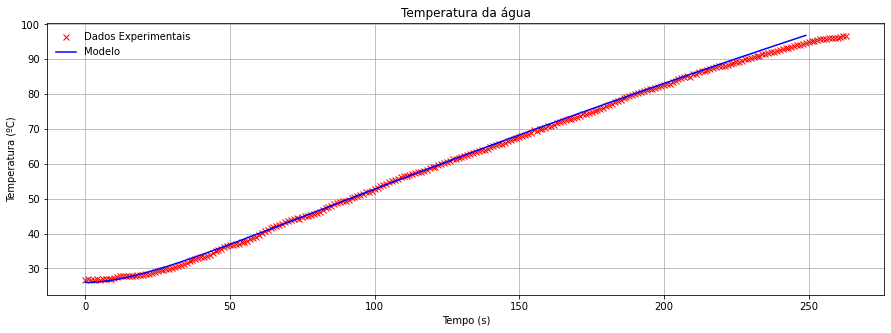

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

lista_tempo= np.arange(0,250,1)


#condições iniciais

Tp_0 = 26 +273.15
Tag_0 = 26 +273.15

x_0 = [Tp_0,Tag_0]

x_lista = odeint(modelo,x_0,lista_tempo)

Tp_lista = x_lista[:,0]
Tag_lista = x_lista[:,1]
#Equacionando as perdas da panela

Qpag_lista = []
Qpa_lista = []
sQpa_Qpag=[]

for x,y in zip(Tp_lista,Tag_lista):
    Qpa = (x - Tar)/((dp/(kp*Ap))+(1/(hpa*Ap)))
    Qpag =(x-y)*(hpag*Ap) 
    Qpa_lista.append(Qpa)
    Qpag_lista.append(Qpag)
    sQpa_Qpag.append(Qpa+Qpag)


#TRnaformando em Celsius

Tp_lista_celsius=[i-273.15 for i in Tp_lista]
Tag_lista_celsius=[i-273.15 for i in Tag_lista]

plt.figure(figsize=(15,5))

plt.plot(tempo_medido,sem_tampa_medido, 'x',color = 'red' ,label = "Dados Experimentais")
plt.plot(lista_tempo,Tag_lista_celsius , 'b',label = 'Modelo')         
plt.ylabel("Temperatura (ºC)")
plt.xlabel("Tempo (s)")
plt.title("Temperatura da água")
plt.legend(loc='best', fancybox=True, framealpha=0)
plt.grid(True)
plt.show()

Para justificar a diferença gráfica entre a temperatura da panela e da agua , plotamos um grafico dos fluxos de calor que saem da panela.

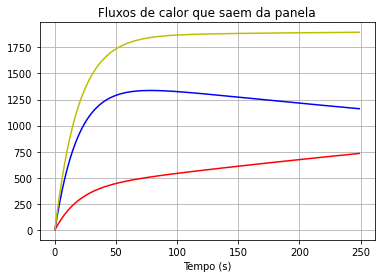

In [19]:
plt.plot(lista_tempo,Qpa_lista , 'r')
plt.plot(lista_tempo,Qpag_lista , 'b')    
plt.plot(lista_tempo,sQpa_Qpag, 'y') 
#plt.ylabel("Temperatura - graus Celsius")
plt.xlabel("Tempo (s)")
#plt.legend(loc='best', fancybox=True, framealpha=0)
plt.title('Fluxos de calor que saem da panela')
plt.grid(True)
plt.show()

**Comparação entre a temperatura da panela e da água**

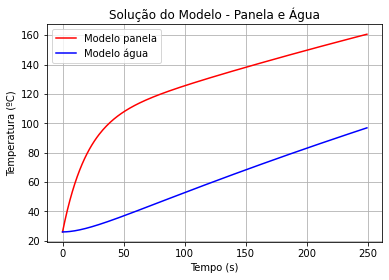

In [20]:
plt.plot(lista_tempo,Tp_lista_celsius , 'r',label = 'Modelo panela')
plt.plot(lista_tempo,Tag_lista_celsius , 'b',label = 'Modelo água')
plt.ylabel("Temperatura (ºC)")
plt.xlabel("Tempo (s)")
plt.title('Solução do Modelo - Panela e Água')
plt.legend()
plt.grid(True)
plt.show()

**Gráfico conclusivo**

Em quanto tempo a água atinge a temperatura de ebulição(100) em diferentes potênciais?

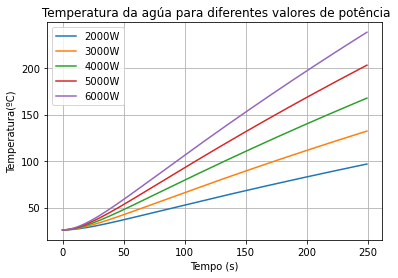

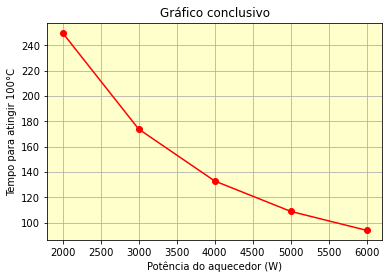

In [21]:
def modelo_2(x,t,Pot):  # (Tp_0,Ta)
    Tp = x[0]
    Tag = x[1]

    #Fluxos de Calor
    
    Qf = Pot 
    Qpa = (Tp - Tar)/((dp/(kp*Ap))+(1/(hpa*Ap)))
    Qpag =(Tp-Tag)*(hpag*Ap)  #Influencia apenas Tpanela 
    Qaga = (Tag-Tar)*haga*area_contato
    
    
    #Equações Diferenciais :
    
    dTpdt = (Qf - Qpa - Qpag)/(mp*cp)
    dTagdt = (Qpag - Qaga)/(ma*ca)
    dxdt = [ dTpdt,dTagdt]
    
    return dxdt

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

lista_tempo= np.arange(0,250,1)


#condições iniciais

Tp_0 = 26 +273.15
Tag_0 = 26 +273.15

x_0 = [Tp_0,Tag_0]

def tempo_ate_100graus(listaTemperatura, listaTempo):
    #vamos iniciar com valor máximo
    tempobuscado=250
    for i, temperatura in enumerate(listaTemperatura):
        if temperatura >= 100:
            tempobuscado=listaTempo[i]
            break
    return tempobuscado










lista_P = [2000,3000,4000,5000,6000]
lista_tempo_ate100=[]

for Pot in lista_P:
    x_lista = odeint(modelo_2,x_0,lista_tempo,args= (Pot,))
    Tag_lista = x_lista[:,1]
    Tag_lista_celsius=[i-273.15 for i in Tag_lista]
    plt.plot(lista_tempo,Tag_lista_celsius,label = (str(Pot)+'W'))
    lista_tempo_ate100.append(tempo_ate_100graus(Tag_lista_celsius,lista_tempo))
    
    
    
    #lisTemposAte190.append(TempoAte190graus(lisTempCelsius, lisTempoH))
   
plt.title(" Temperatura da agúa para diferentes valores de potência")
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura(ºC)")
plt.legend()
plt.grid(True)
plt.show()



#plotando o gráfico conclusivo
ax=plt.axes()
ax.set_facecolor('xkcd:ivory')
plt.title("Gráfico conclusivo")
plt.plot(lista_P, lista_tempo_ate100, 'r-o')
plt.xlabel("Potência do aquecedor (W)")
plt.ylabel("Tempo para atingir 100°C")
plt.grid(True)
plt.show()
    
